In [116]:
import gzip
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.layers.advanced_activations import LeakyReLU
def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc



In [117]:
path = 'flatland_train.data'
X, y = pickle.load(gzip.open(path, 'rb'))
y[y != 0] -= 2
X = X / 255.

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(-1, 50,50, 1)
X_test = X_test.reshape(-1, 50, 50, 1)

  

In [119]:
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')

In [120]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


print('Original label:', y_train[85])
print('After conversion to one-hot:', y_train_one_hot[85])

Original label: 1.0
After conversion to one-hot: [0. 1. 0. 0. 0.]


In [121]:
train_X,valid_X,train_label,valid_label = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=32)

In [122]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(50, 50, 1),padding='same'))
model.add(keras.layers.LeakyReLU(alpha=0.1))
model.add(keras.layers.MaxPooling2D((2, 2),padding='same'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.LeakyReLU(alpha=0.1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.LeakyReLU(alpha=0.1))                  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.LeakyReLU(alpha=0.1))                  
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 50, 50, 32)        320       
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 25, 25, 64)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                

In [123]:
loss = model.fit(X_train, y_train, epochs =15, validation_split=0.2)

Epoch 1/15
200/200 [==============================] - 4s 17ms/step - loss: 1.6706 - accuracy: 0.3384 - val_loss: 1.3532 - val_accuracy: 0.4650
Epoch 2/15
200/200 [==============================] - 3s 14ms/step - loss: 1.3076 - accuracy: 0.4377 - val_loss: 1.2175 - val_accuracy: 0.4688
Epoch 3/15
200/200 [==============================] - 3s 14ms/step - loss: 1.2449 - accuracy: 0.4528 - val_loss: 1.2037 - val_accuracy: 0.4750
Epoch 4/15
200/200 [==============================] - 3s 14ms/step - loss: 1.2211 - accuracy: 0.4616 - val_loss: 1.1644 - val_accuracy: 0.5000
Epoch 5/15
200/200 [==============================] - 3s 14ms/step - loss: 1.1897 - accuracy: 0.4770 - val_loss: 1.1499 - val_accuracy: 0.5013
Epoch 6/15
200/200 [==============================] - 3s 14ms/step - loss: 1.1684 - accuracy: 0.4883 - val_loss: 1.2205 - val_accuracy: 0.4744
Epoch 7/15
200/200 [==============================] - 3s 14ms/step - loss: 1.1495 - accuracy: 0.4897 - val_loss: 1.1826 - val_accuracy: 0.4950

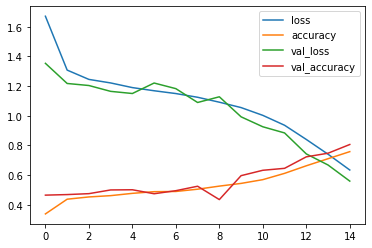

In [124]:
pd.DataFrame(loss.history).plot()


In [125]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

63/63 - 1s - loss: 0.5388 - accuracy: 0.8125 - 581ms/epoch - 9ms/step
0.8125


In [126]:
model.save('model.h5')

In [127]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.8164